In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [448]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = train.copy()
train.head()
df.tail()
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [450]:
df.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [451]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd']


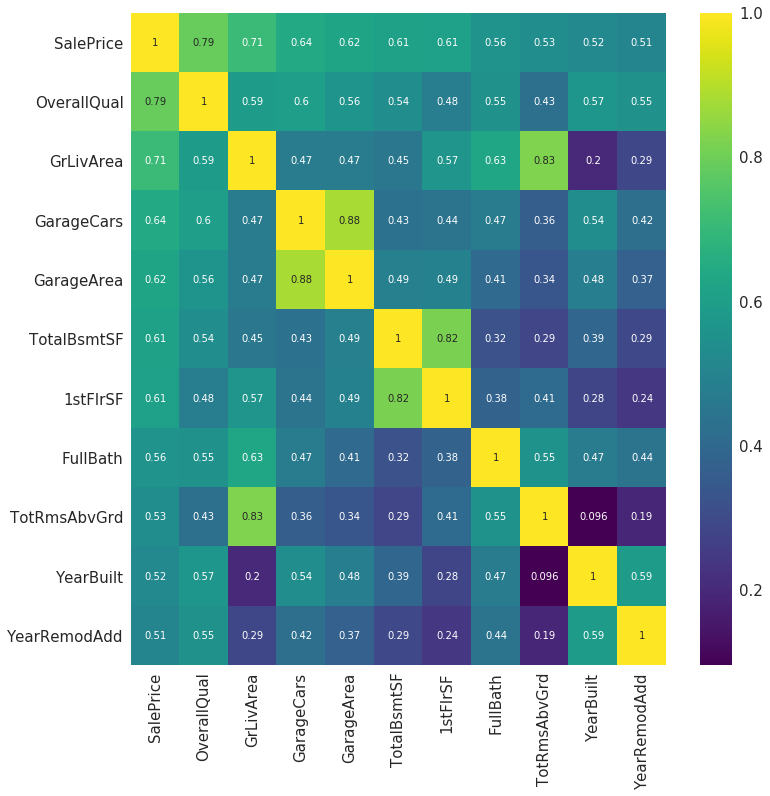

In [452]:
corrmat = df.corr()
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
print(cols.values)
# df[cols].values.T
data = np.corrcoef(df[cols].values.T)
# data.shape
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 12))
plt.tight_layout()
sns.heatmap(data=data, cmap='viridis', yticklabels=cols.values, annot=True, annot_kws={'size': 10}, xticklabels=cols.values)
# sns.heatmap(cols, cmap='viridis')
# top10cor = corrmat.nlargest(10)
# top10corr = np.array([top10cor], ndmin=1)
# sns.heatmap(df.corr()['SalePrice'], yticklabels=True, xticklabels=True, annot=True, cmap='viridis')


Now we'll take ['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd'] these features. 
 
 But one thing to note here all these features are correlated w/ each other also. See light green squares near a yellow square(with cf=0.8 or more)

Let's make a pair plot to have all the glance

GarageCars and GarageArea are highly correlated with each other, so lets keep only garage area 

In [453]:
feature_list = cols.tolist()
feature_list.remove('GarageArea')
feature_list

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

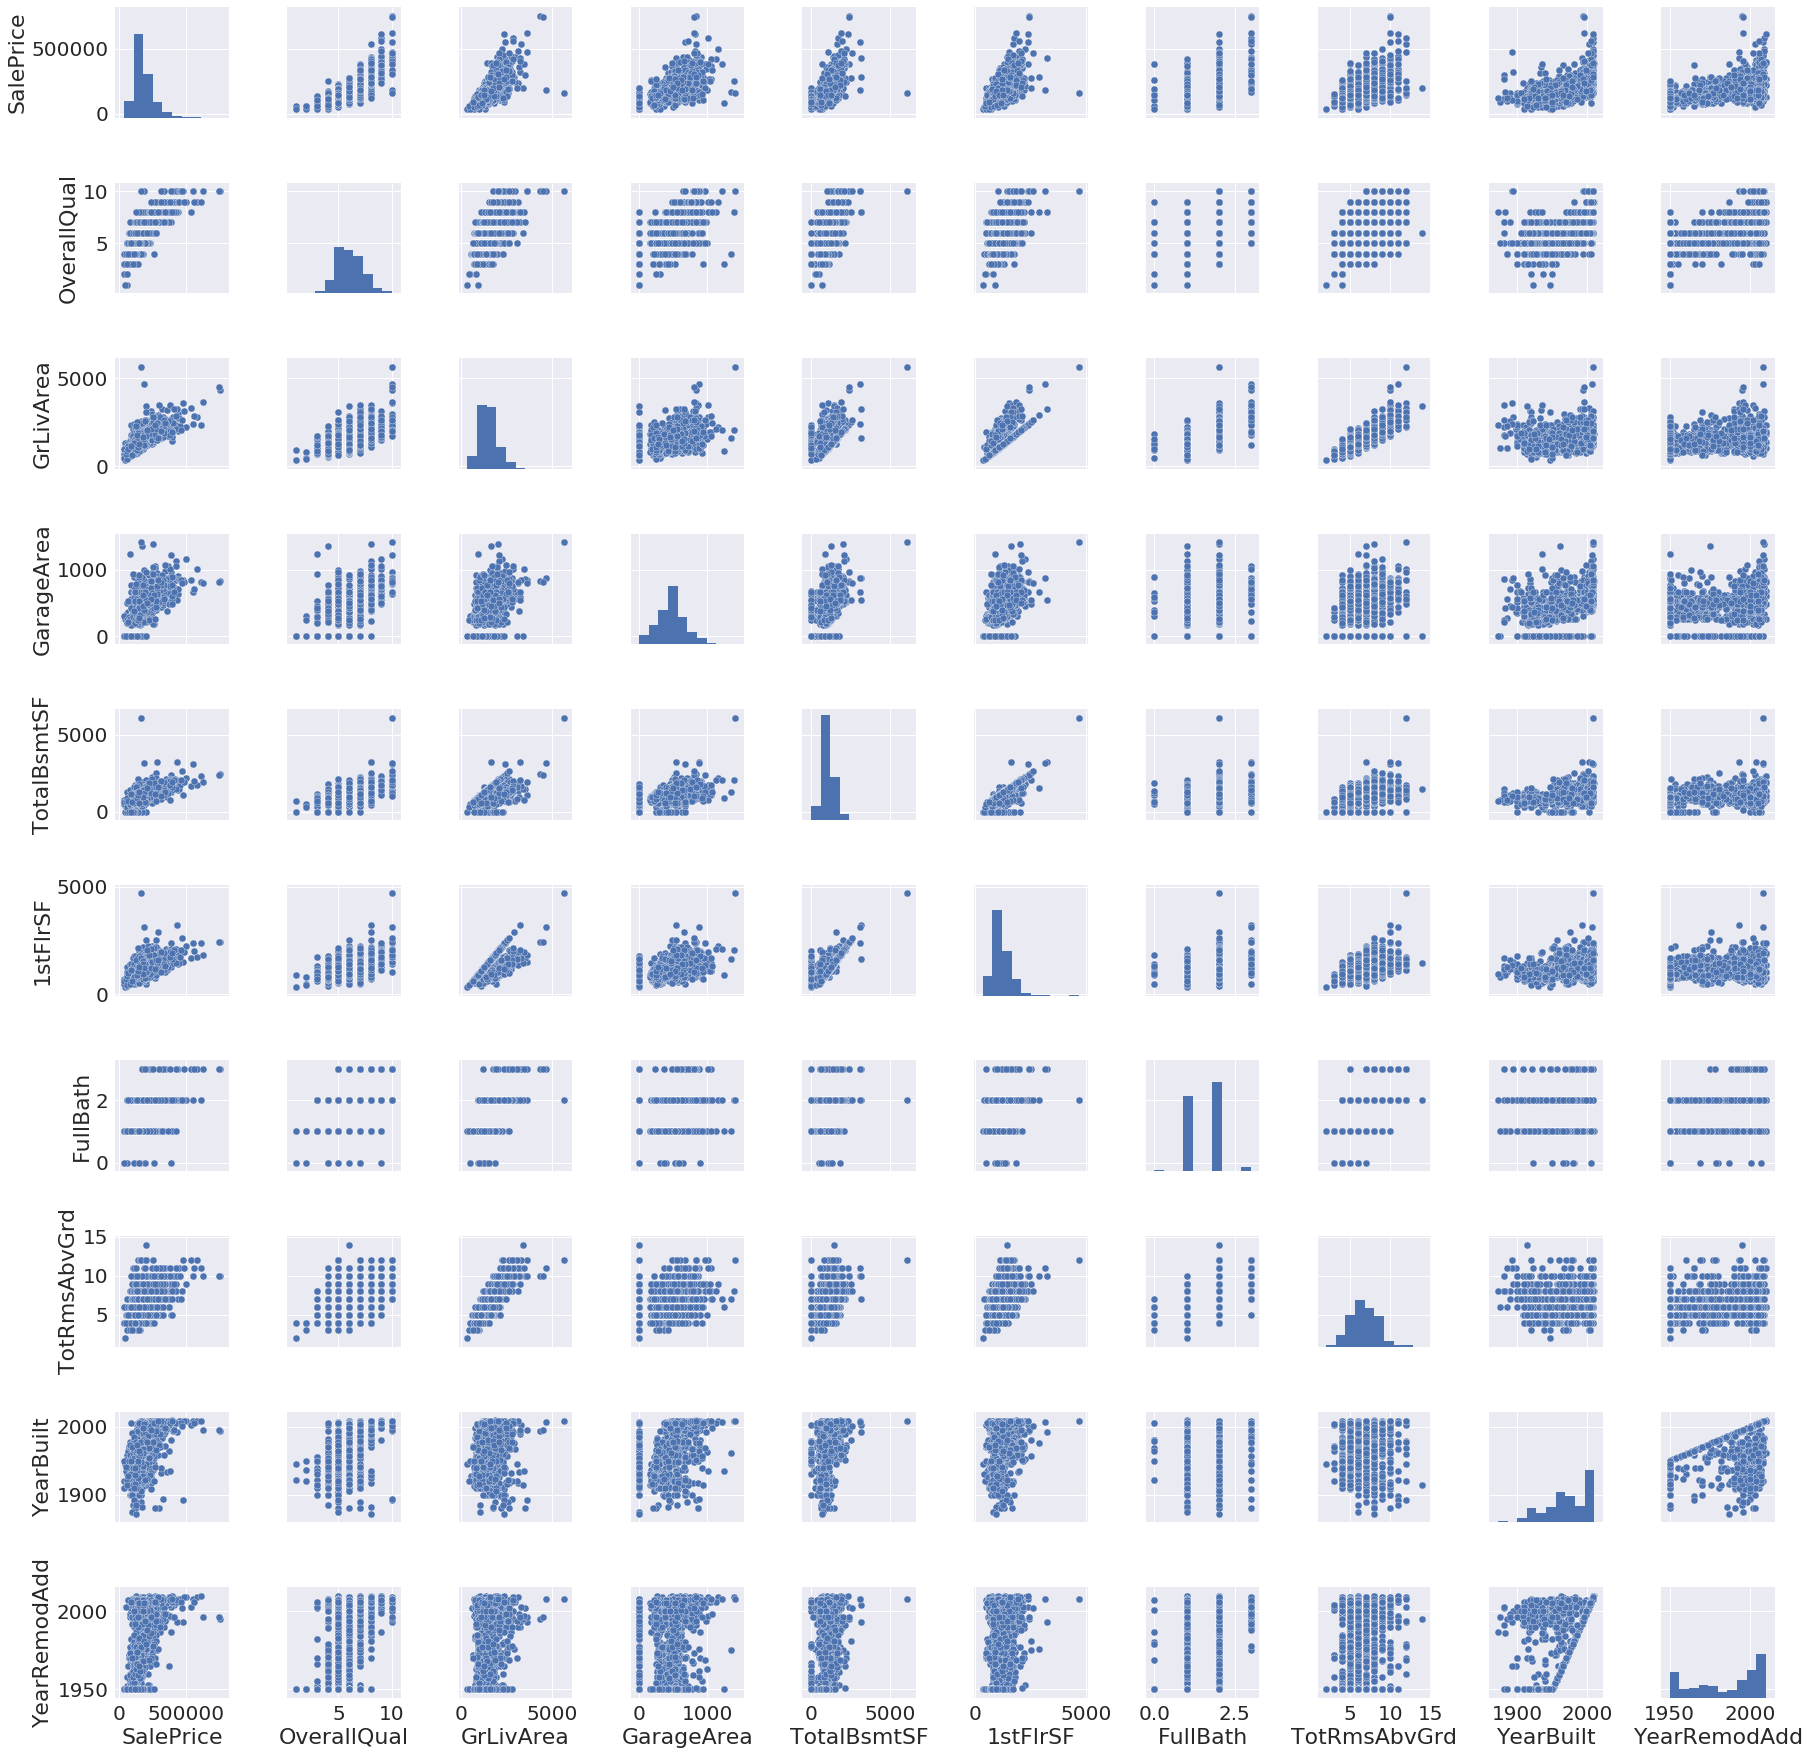

In [454]:
sns.set(font_scale=2)
plt.tight_layout()
sns.pairplot(df[feature_list], dropna=True)

**Observations from the pairplot**
> TotalBsmtSF and 1stFlrSF are highly correlated.
> We need to explore TotalBsmtSF, GrLivArea, 1stFlrSF wit SalePrice to search for outliers and missing data

**Missing Data **

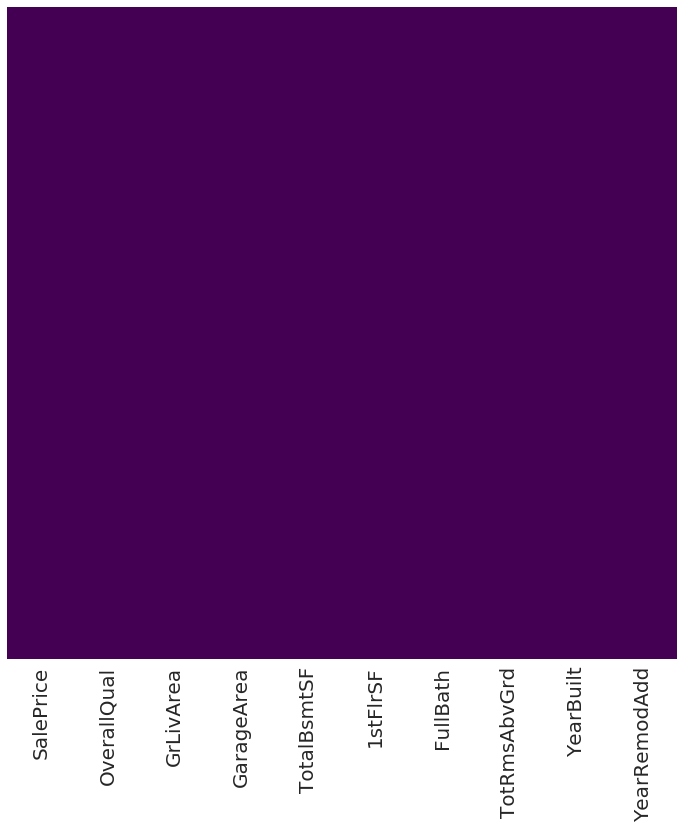

In [455]:
#Visualising NULL values via heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df[feature_list].isnull(), cmap='viridis', cbar=False, yticklabels=False, xticklabels=feature_list)

In [471]:
df_feat = df[feature_list].copy()

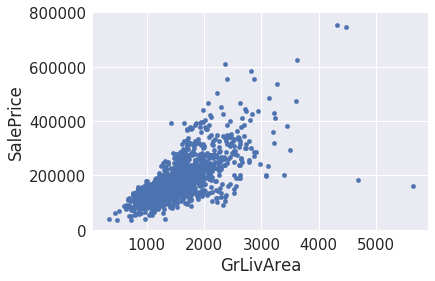

In [472]:
#bivariate analysis saleprice/grlivarea
sns.set(font_scale=1.5)
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We got outliers here, see in GRLIVArea above 4k. so we'll delete them

In [473]:
df_feat.sort_values(by='GrLivArea', ascending=False)[:2]

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
1298,160000,10,5642,1418,6110,4692,2,12,2008,2008
523,184750,10,4676,884,3138,3138,3,11,2007,2008


In [474]:
df_feat.drop(df_feat[df_feat['GrLivArea']==4476].index, inplace=True)
df_feat.drop(df_feat[df_feat['GrLivArea']==4676].index, inplace=True)



-------------------------------------------------------------------------------------



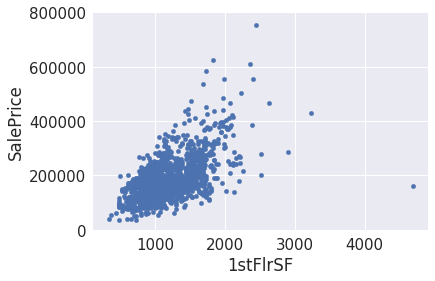

In [475]:
#bivariate analysis saleprice/grlivarea
var = '1stFlrSF'
data = pd.concat([df_feat['SalePrice'], df_feat[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [476]:
df_feat.sort_values(by='1stFlrSF', ascending=False)[:2]
#

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
1298,160000,10,5642,1418,6110,4692,2,12,2008,2008
496,430000,8,3228,546,3200,3228,3,10,1992,1993


again outlier at greator than 3000

In [477]:
df_feat.drop(df_feat[df_feat['1stFlrSF']==4692].index, inplace=True)
# df_feat.drop(df_feat[df_feat['1stFlrSF']==3138].index, inplace=True)



------------------------------------------------------------------



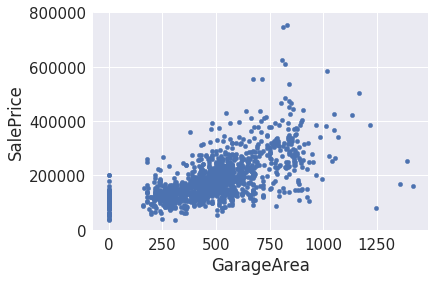

In [478]:
#bivariate analysis saleprice/grlivarea
var = 'GarageArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We'll drop values above garageArea 

In [479]:
# df.drop(df[feature_list].sort_values(by='GarageArea', ascending=False)[:4], axis=1, inplace=False)
df_feat = df[feature_list].copy()
df_feat.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,548,856,856,2,8,2003,2003
1,181500,6,1262,460,1262,1262,2,6,1976,1976
2,223500,7,1786,608,920,920,2,6,2001,2002
3,140000,7,1717,642,756,961,1,7,1915,1970
4,250000,8,2198,836,1145,1145,2,9,2000,2000


In [480]:
df_feat.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [481]:
df_feat.sort_values(by='GarageArea', ascending=False)[:4]


,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd
1298,160000,10,5642,1418,6110,4692,2,2008,2008
581,253293,8,2042,1390,2042,2042,2,2008,2009
1190,168000,4,1622,1356,1249,1622,1,1961,1975
1061,81000,3,894,1248,894,894,1,1935,1950


In [482]:
# df[df['GarageArea'] == 1418].index
# df[df['Id']==1298].index
df_feat.drop(df_feat[df_feat['GarageArea']==1418].index, inplace=True)
df_feat.drop(df_feat[df_feat['GarageArea']==1390].index, inplace=True)
df_feat.drop(df_feat[df_feat['GarageArea']==1356].index, inplace=True)
df_feat.drop(df_feat[df_feat['GarageArea']==1248].index, inplace=True)




------



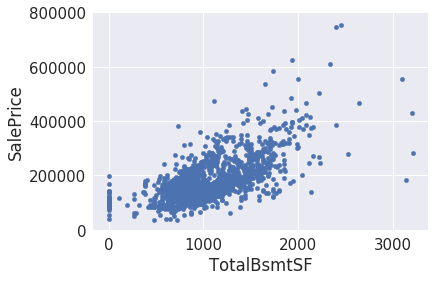

In [483]:
#bivariate analysis saleprice/totalbsmntsf
var = 'TotalBsmtSF'
data = pd.concat([df_feat['SalePrice'], df_feat[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));



----



In [484]:
df_feat.drop('YearRemodAdd', axis=1, inplace=True)

In [485]:
# decide b/w TotalBsmtSF and 1stFlrSF
# df_feat.drop('1stFlrSF', axis=1, inplace=True)
# no they both are helping...

In [486]:
df_feat.head(2)

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt
0,208500,7,1710,548,856,856,2,2003
1,181500,6,1262,460,1262,1262,2,1976


In [487]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_price = scaler.fit_transform(df_feat['SalePrice'][:, np.newaxis])
scaled_price[scaled_price[:, 0].argsort()][20:]

/home/aadi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.41667682],
       [-1.41541826],
       [-1.36507589],
       ...,
       [ 5.58846513],
       [ 7.09873649],
       [ 7.22459243]])

In [488]:
# df_feat['OverallQual'].value_counts()

In [489]:
bath = pd.get_dummies(df_feat['FullBath'], drop_first=True)
df_feat = pd.concat([df_feat, bath], axis=1)
df_feat.drop('FullBath', axis=1, inplace=True)
df_feat.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,1,2,3
0,208500,7,1710,548,856,856,2003,0,1,0
1,181500,6,1262,460,1262,1262,1976,0,1,0
2,223500,7,1786,608,920,920,2001,0,1,0
3,140000,7,1717,642,756,961,1915,1,0,0
4,250000,8,2198,836,1145,1145,2000,0,1,0


Here the main problem is multicollinearity, the features are correlated with each other and its a huge problem.
as results may be biased in the end.

In [490]:
from sklearn.model_selection import train_test_split
X = df_feat.drop('SalePrice', axis=1)
# y = df_feat['SalePrice']
y = scaled_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [491]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)

/home/aadi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [492]:
pred = rfr.predict(X_test)
# pred = gb.predict(X_test)
pred

array([ 1.90068033e+00, -3.51807241e-01, -5.40752101e-02, -2.46846057e-01,
       -6.31807680e-01, -2.14704462e-01, -1.02790579e+00,  9.09967304e-01,
        1.16380660e+00, -7.14652545e-01,  1.18603629e+00, -6.86958637e-01,
       -1.44954719e-01, -6.77867386e-04,  1.12472355e-01, -2.71956898e-01,
       -3.19690975e-01,  1.45947500e+00,  1.99258128e+00,  5.19558635e-01,
       -5.77963360e-01, -5.43203521e-01, -4.15994166e-01,  1.95437161e-01,
       -3.93867872e-01,  3.20808247e-01, -2.33398601e-01, -4.77234493e-02,
       -2.83588253e-01, -6.21277360e-01, -5.62560480e-01, -1.09645204e-01,
        1.08664992e+00, -9.94898938e-01, -1.39417309e+00, -7.17244926e-01,
        4.94374797e-01, -5.56358574e-01, -3.72567526e-01,  2.37374187e-01,
       -4.09237481e-01, -1.04342855e+00, -6.53575662e-01, -8.48245045e-01,
        1.27455599e-01,  1.43391706e+00, -7.63368616e-02,  1.48339644e+00,
       -2.08060275e-01, -1.46194463e-01,  1.00592076e+00, -1.14878804e+00,
        1.21107016e-01, -

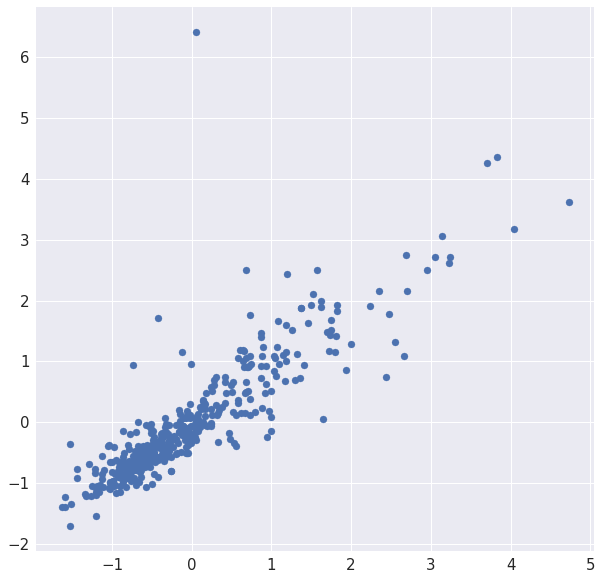

In [493]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred)

In [494]:
from sklearn import metrics

In [495]:
print('With Dummies')
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

With Dummies
MAE: 0.2719662194522945
MSE: 0.24571314324834195
RMSE: 0.4956946068380631


In [299]:
pred = scaler.inverse_transform(pred)

In [303]:
pred

array([257804.44      , 151483.575     , 192566.005     , 126647.5       ,
       118401.83      , 337457.69      , 131964.8125    , 127578.25      ,
       125719.545     , 156699.415     , 137735.90833333, 299913.015     ,
       128726.25      , 160493.1       , 360772.2       , 110588.72      ,
       276591.05      , 154504.27      , 137513.91666667, 170340.25      ,
       119506.995     , 115791.99      , 133993.85      , 206824.2       ,
       226508.995     , 199322.28      , 108732.9       , 260196.44      ,
       154280.875     , 165322.25      , 134333.37      , 124951.75      ,
        94275.795     , 205929.42      ,  83105.75      , 237876.21      ,
       165135.2       , 148532.44266667,  95353.95      , 144098.81      ,
       240561.45      , 159825.875     , 271301.9875    ,  96086.385     ,
       178345.46      , 134269.62      , 125327.75      , 142053.        ,
       329122.9       , 172529.25      , 188637.955     ,  91405.04833333,
        97240.61      , 2

In [256]:
print('Without dummy variable')
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Without dummy variable


ValueError: Found input variables with inconsistent numbers of samples: [437, 1456]

In [146]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [147]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred})
submission.to_csv('submission.csv', index=False)
submission.head(3)

ValueError: array length 2918 does not match index length 1459